# VLMs on Kiara

In this notebook we will use vision language models on yet experimental LLM infrastructure infrastructure. To use it, you must enter two enviroment variables `KIARA_API_KEY` and `KIARA_LLM_SERVER`.

In [5]:
from skimage.io import imread
import stackview
from image_utilities import numpy_to_bytestream
import base64
from stackview._image_widget import _img_to_rgb

## Example images
First we load a natural image

The LLava model is capable of describing images via the [ollama](https://ollama.com/) API.

In [12]:
def prompt_kiara(prompt:str, image, model="vllm-llama-4-scout-17b-16e-instruct"):
    """A prompt helper function that sends a message to the llm service provider
    and returns only the text response.
    """
    import os
    import openai
    
    rgb_image = _img_to_rgb(image)
    byte_stream = numpy_to_bytestream(rgb_image)
    base64_image = base64.b64encode(byte_stream).decode('utf-8')

    message = [{"role": "user", "content": [
        {"type": "text", "text": prompt},
        {
        "type": "image_url",
        "image_url": {
            "url": f"data:image/jpeg;base64,{base64_image}"
        }
    }]}]
        
    # setup connection to the LLM
    client = openai.OpenAI(
        base_url=os.environ.get('KIARA_LLM_SERVER') + "api/",
        api_key=os.environ.get('KIARA_API_KEY')
    )
    
    # submit prompt
    response = client.chat.completions.create(
        model=model,
        messages=message
    )
    
    # extract answer
    return response.choices[0].message.content

[[[176 178 179]
  [175 178 178]
  [177 177 180]
  ...
  [182 186 188]
  [185 188 191]
  [191 194 197]]

 [[178 180 181]
  [178 179 181]
  [178 180 181]
  ...
  [185 189 192]
  [187 191 192]
  [191 195 198]]

 [[181 183 185]
  [180 182 183]
  [180 181 183]
  ...
  [190 193 196]
  [189 193 196]
  [192 195 198]]

 ...

 [[125  91  66]
  [124  90  65]
  [123  89  65]
  ...
  [137  92  64]
  [136  91  62]
  [135  89  61]]

 [[122  88  64]
  [121  87  63]
  [121  87  63]
  ...
  [142  96  68]
  [142  96  68]
  [139  94  65]]

 [[120  86  62]
  [120  86  60]
  [119  85  61]
  ...
  [144  99  70]
  [144  99  70]
  [142  97  68]]]
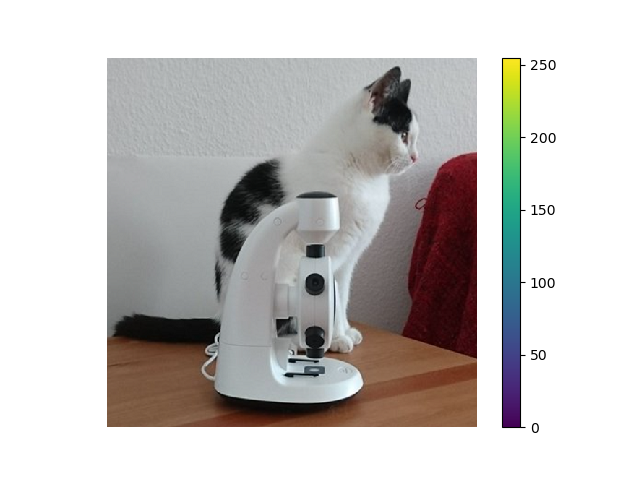
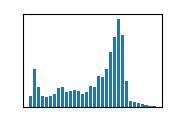

In [13]:
image = imread("data/real_cat.png")
stackview.insight(image)

In [14]:
prompt_kiara("what's in this image?", image)

'The image shows a black and white cat standing on a table next to a white device that appears to be a digital microscope. The cat is facing to the right, with its tail extending behind it. The device has a white body with black knobs and a small camera on top. It sits on a light-colored wooden table, with a red fabric object partially visible to the right. The background features a white wall with a textured surface.'

## Exercise
Load the MRI dataset and ask LLava about the image.